# Laboratorio 2.1: Clasificación

*Introducción a la Minería de Datos*

Bárbara Poblete, José Miguel Herrera, Hernán Sarmiento

**23 de Abril 2018**

# INTEGRANTES

Escriba a continuación el nombre de los integrantes del presente laboratorio:

1. Sven Reisenegger

2. Pablo Torres Dessi

# Instrucciones

1. Trabaje en equipos de 2 personas. Pueden no ser necesariamente los mismos equipos del laboratorio anterior.

2. Las respuestas a cada pregunta se deben escribir en el bloque que está a continuación de **RESPUESTA A PREGUNTA x**, modificando el código o escribiendo la respuesta en el bloque correspondiente. 

3. Nota: Para ejecutar un bloque, presione Shift+Enter al mismo tiempo que tiene el foco en el bloque correspondiente (un bloque en foco tiene un borde azul o verde alrededor).

4. Al final del laboratorio se debe entregar este mismo notebook en U-Cursos. Sólo uno de los dos integrantes de cada grupo debe hacerlo. Entreguen lo que alcanzaron a hacer. Se abrirá una segunda entrega para subir lo que les quedó pendiente y poder subir la nota. Esto es opcional. 

5. También hay una **parte 3** (bonus) que es opcional y puede ayudar a subir nota. No es obligatoria. 




# Del Laboratorio

En este laboratorio, primero vamos a hacer un análisis de datos y luego vamos a entrenar un clasificador de 3 maneras: 

* Entrenar/testear con los mismos datos,  

* Dividiendo el dataset en una parte para entrenar y otra para testear, y finalmente, 

* Usando cross-validation. Veremos accuracy, presicion y recall y se pedirá analizar los resultados. 


# Parte 1: Evaluar un clasificador

Usaremos el **Iris Dataset**, que viene en **scikit-learn**, y que además fue mencionado en el tutorial:

## PREGUNTA 1.1

Indique lo siguiente:
* Tamaño del dataset. 
* Cuántas clases son.
* Qué nombre tienen las clases.
* Cuántas instancias hay de cada clase.

Indique en cada caso cómo obtuvo la respuesta. Incluya código si es necesario. 

In [1]:
### RESPUESTA A PREGUNTA 1.1

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data      ## datos, caracteristicas o features de cada flor. 
y = iris.target    ## clase para cada instancia anterior.

print(iris.feature_names)
print(len(X))
print(iris.target_names)

cant=[0,0,0]
for i in iris.target:
    cant[i]+=1
print(cant)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
150
['setosa' 'versicolor' 'virginica']
[50, 50, 50]


### RESPUESTA A PREGUNTA 1.1
El dataset es de 150 filas y cuatro columnas
Son tres clases de flores
Las clases son setosa, versicolor y virginica
Hay 50 de cada clase

## Pregunta 1.2

Ejecute las siguientes líneas de código. Refiérase a la correlación entre variables, ¿hay o no hay? 
Explique. 

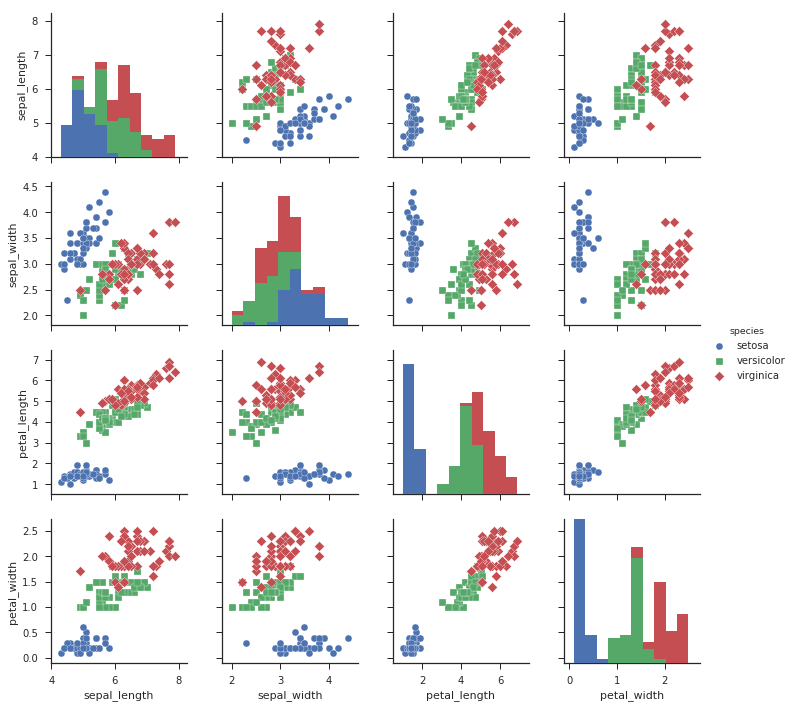

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"]) # Parametro kind="reg" agrega una recta
plt.show()


### RESPUESTA A PREGUNTA 1.2

 petal_width con petal_length tienen una alta correlación, al igual que petal_length con sepal_length.
 Los otros gráficos no indican una correlación tan alta, ya que los datos se encuentran mas dispersos dentro de su misma clase.


# PARTE 2: Entrenar/testear con los mismos datos

Useremos el clasificador **K-NN** (K-Nearest Neighbors), usando distintas formas de evaluación, y vamos a compararlas mediante el **Accuracy o Exactitud**.

## PREGUNTA 2.1

Usando el siguiente código, complete lo que falta para entrenar el clasificador **KNN** con todos los datos. Luego, haga predicción usando todos los datos de entrenamiento. 
Muestre Accuracy, Precision, Recall y F1-score. 

NOTA: Emplee **fit** y **predict** de igual manera que en tutorial.


In [13]:
## RESPUESTA PREGUNTA 2.1

from sklearn.neural_network import MLPClassifier
knn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(117, 50, 10), random_state=1)


# .... COMPLETE ACA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('listo')

listo


## Pregunta 2.2

Comente los resultados obtenidos: ¿son buenos? ¿son malos? ¿A qué cree que se debe este desempeño? ¿Es correcto hacer este análisis? 


### RESPUESTA A PREGUNTA 2.2
Los resultados son bastante buenos, ya que identifica de manera correcta los elementos de la clase 0. Sin embargo entre las clases 1 y 2 tienen elementos cruzados.
La diferenciación de la clase 0 se debe a que esta clase tiene una alta correlación entre sus datos y se separa bastante de las otras dos clases, pero entre las clases 1 y 2, si se observan los gráficos, hay algunos elementos que se cruzan y por esto el método de KNN no los detecta bien.
El buen desempeño en este caso se debe a que se usaron los mismos datos de testeo para hacer las pruebas, por lo que probablemente existe overfitting.

# Parte 3: Dividiendo el dataset para entrenar y testear

Ahora lo que haremos será dividir nuestro dataset en 70% entrenar y 30% para testear. Use la función ***train_test_split()*** y utilice las variables `X_train, X_test, y_train, y_test`.

## Pregunta 3.1

Escriba el código necesario para entrenar el modelo y determine el Accuracy, Precision y Recall del clasificador. 
Entrene usando el ***Training set*** y pruebe sobre el ***Testing set***, en base a la división 70%-30%, respectivamente. 

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**


In [14]:
import numpy as np
X = np.load('picks.npy')
y = np.load('winners.npy')
print(y)
print('asd')

[ 1. -1. -1. ...  1.  1. -1.]
asd


In [16]:
### RESPUESTA A PREGUNTA 3.1
# ...
# Recuerde usar las variables X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=20, stratify = y)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy = ", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy =  0.5314
             precision    recall  f1-score   support

       -1.0       0.51      0.50      0.51      7217
        1.0       0.55      0.56      0.55      7783

avg / total       0.53      0.53      0.53     15000



## Pregunta 3.2

Comente el resultado obtenido y refiérase a Precision y Recall. Compare el Accuracy de resultado de la pregunta 2.2 y comente. 

### RESPUESTA A PREGUNTA 3.2
Si se miran los valores de precision y recall, se observa que la clasificación hecha captura perfectamente la clase 0. De nuevo se ve que entre las clases 1 y 2 hay elementos que no se clasifican de forma correcta. Ambos tienen precision y recall de 0.93, lo primero indica que hay elementos de otra clase que están siendo clasificados dentro de la clase en cuestión y lo segundo indica que hay elementos de la clase que no están siendo detectados correctamente.

# PARTE 4: Cross-validation

Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.


In [ ]:
## EJECUTAR ESTE BLOQUE
from sklearn.model_selection import cross_val_score
from sklearn import metrics, cross_validation

print("\nPREDICTIONS******")
predictions = cross_validation.cross_val_predict(knn, X, y, cv=5)  ## cv es la cantidad de folds
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Metricas:")
print(metrics.classification_report(y_test, predictions))

El código anterior va a realizar 5-fold cross-validation usando el clasificador K-NN sobre los datos. Después se puede tomar el promedio y el intervalo de confianza de los resultados para tener otra medida de rendimiendo del clasificador. 

Además se muestra la predición sobre los datos para testear. 

## Pregunta 4.1

Compare los valores usando los siguientes folds: `k=3`, `k=7`, `k=15`. ¿En qué fold (k) se obtiene un mejor resultado? Explique e indique cómo llegó a esa conclusión. 

In [ ]:
### RESPUESTA PREGUNTA 4.1 (CODIGO)

print("\n----  K = 3  --- ")
## Codigo para k = 3

print("\n----  K = 7  --- ")
## Codigo para k = 7

print("\n----  K = 15  --- ")
## Codigo para k = 15


### RESPUESTA A PREGUNTA 4.1 (ANÁLISIS)
::
::


# PARTE 5: FINAL

## Pregunta 5.1

Respecto a los 3 tipos de experimentos, ¿qué modelo considera que es el mejor y por qué? (Refiérase a casos de overfitting, tamaño del dataset, distribución de clases, entre otras cosas.)


### RESPUESTA A PREGUNTA 5.1
::
::


# Declaración de trabajo en equipo

FINALMENTE, agregue una sección llamada *Declaración de trabajo en equipo* e indiquen "Sí, ambos trabajamos equitativamente", si efectivamente todos trabajaron por igual. En caso contrario, indiquen "No, [NOMBRE_INTEGRANTE] hizo la mayor parte del trabajo".

Si, ambos trabajamos equitativamente.

##  BONUS: Selección de modelo

Un uso práctico de cross-validation es el elegir el clasificador más conveniente para los datos.

Vamos a usar el dataset de diagnóstico de cáncer de mamas:

In [ ]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

X = breast.data
y = breast.target

In [ ]:

print(breast.DESCR)

## PREGUNTA 1 BONUS

Determinaremos el valor de $K$ en el clasificador K-NN que entregue mejor Precision. Para esto, use el promedio del Precision en cross-validation con 10 folds para cada valor de $K$ y grafique los resultados en `matplotlib` en el último bloque.

### RESPUESTA 1 BONUS: 

In [ ]:
### MODIFICAR ESTE BLOQUE
### Use cv_scores para almacenar el Precision en cada iteración de k_range usando 10-fold CV en los datos

cv_scores = list()
k_range = range(1, 50)

for k in k_range:
    ## ESCRIBA ACA
    pass

In [ ]:
## ejecutar este código tras terminar de modificar el bloque anterior
## no es necesario modificar este código

## si tiene problemas ejecutando este bloque, intente reportar los resultados de 
## cv_scores y k_range de forma de poder ver una tendencia en los datos

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, cv_scores)
plt.ylabel("precision")
plt.xlabel("K-nearest neighbors")

## PREGUNTA 2 BONUS

¿Por qué conviene usar precision en este caso particular y no otra métrica ?

### RESPUESTA 2 BONUS
::
::
